# Examen 1

# Reduccion de dimensiones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS, TSNE

In [2]:
SEED = 42

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
data = pd.read_csv('/Users/gblasd/Documents/DataScience/03_UnsupervisedLearning/data/HeartAttack.csv')
print(data.shape)

(1319, 8)


In [5]:
data.head()

age  gender  impluse  pressurehight  pressurelow  glucose    kcm  troponin
0   64       1       66            160           83    160.0   1.80     0.012
1   21       1       94             98           46    296.0   6.75     1.060
2   55       1       64            160           77    270.0   1.99     0.003
3   64       1       70            120           55    270.0  13.87     0.122
4   55       1       64            112           65    300.0   1.08     0.003

Feature	Description
* `age`	Edad del paciente.
* `gender`	Género del paciente, donde 1 podría indicar masculino y 0 femenino (esto es una suposición común).
* `impluse`	Pulso del paciente.
* `pressurehight`	Presión arterial sistólica (el número más alto).
* `pressurelow`	Presión arterial diastólica (el número más bajo).
* `glucose`	Nivel de glucosa en sangre.
* `kcm`	Nivel de Creatina Quinasa-MB (CK-MB), un biomarcador utilizado para detectar daño al tejido cardíaco, especialmente útil en el diagnóstico de ataques cardíacos.
* `troponin`	Nivel de troponina, un biomarcador utilizado para identificar daño al corazón.

# Analisis Exploratorio de Datos

Informacion general del conjunto de datos

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 82.6 KB


Con los percentiles `99` y `1` se identifican rapidamente los outliers presentes en el conjunto de datos.

In [7]:
data.describe(percentiles=[0.01, 0.25, 0.5, 0.75, .99])

age       gender      impluse  pressurehight  pressurelow  \
count  1319.000000  1319.000000  1319.000000    1319.000000  1319.000000   
mean     56.191812     0.659591    78.336619     127.170584    72.269143   
std      13.647315     0.474027    51.630270      26.122720    14.033924   
min      14.000000     0.000000    20.000000      42.000000    38.000000   
1%       22.180000     0.000000    51.000000      76.000000    44.000000   
25%      47.000000     0.000000    64.000000     110.000000    62.000000   
50%      58.000000     1.000000    74.000000     124.000000    72.000000   
75%      65.000000     1.000000    85.000000     143.000000    81.000000   
99%      86.000000     1.000000   125.000000     208.000000   106.820000   
max     103.000000     1.000000  1111.000000     223.000000   154.000000   

           glucose          kcm     troponin  
count  1319.000000  1319.000000  1319.000000  
mean    146.634344    15.274306     0.360942  
std      74.923045    46.327083     1.154568  
min      35.000000     0.321000     0.001000  
1%       67.180000     0.518340     0.003000  
25%      98.000000     1.655000     0.006000  
50%     116.000000     2.850000     0.014000  
75%     169.500000     5.805000     0.085500  
99%     420.740000   300.000000     5.984800  
max     541.000000   300.000000    10.300000

Eliminamos los outliers

In [8]:
# data[data['impluse'] < data['impluse'].quantile(.99)].describe(percentiles=[0.01, 0.25, 0.5, 0.75, .99])
data = data[data['impluse'] < data['impluse'].quantile(.99)]

In [9]:
print(data.shape)

(1303, 8)


Valores ausentes

In [10]:
# valores faltantes
data.isna().sum() / data.shape[0]

age              0.0
gender           0.0
impluse          0.0
pressurehight    0.0
pressurelow      0.0
glucose          0.0
kcm              0.0
troponin         0.0
dtype: float64

Mapa de correlacion entre las variables

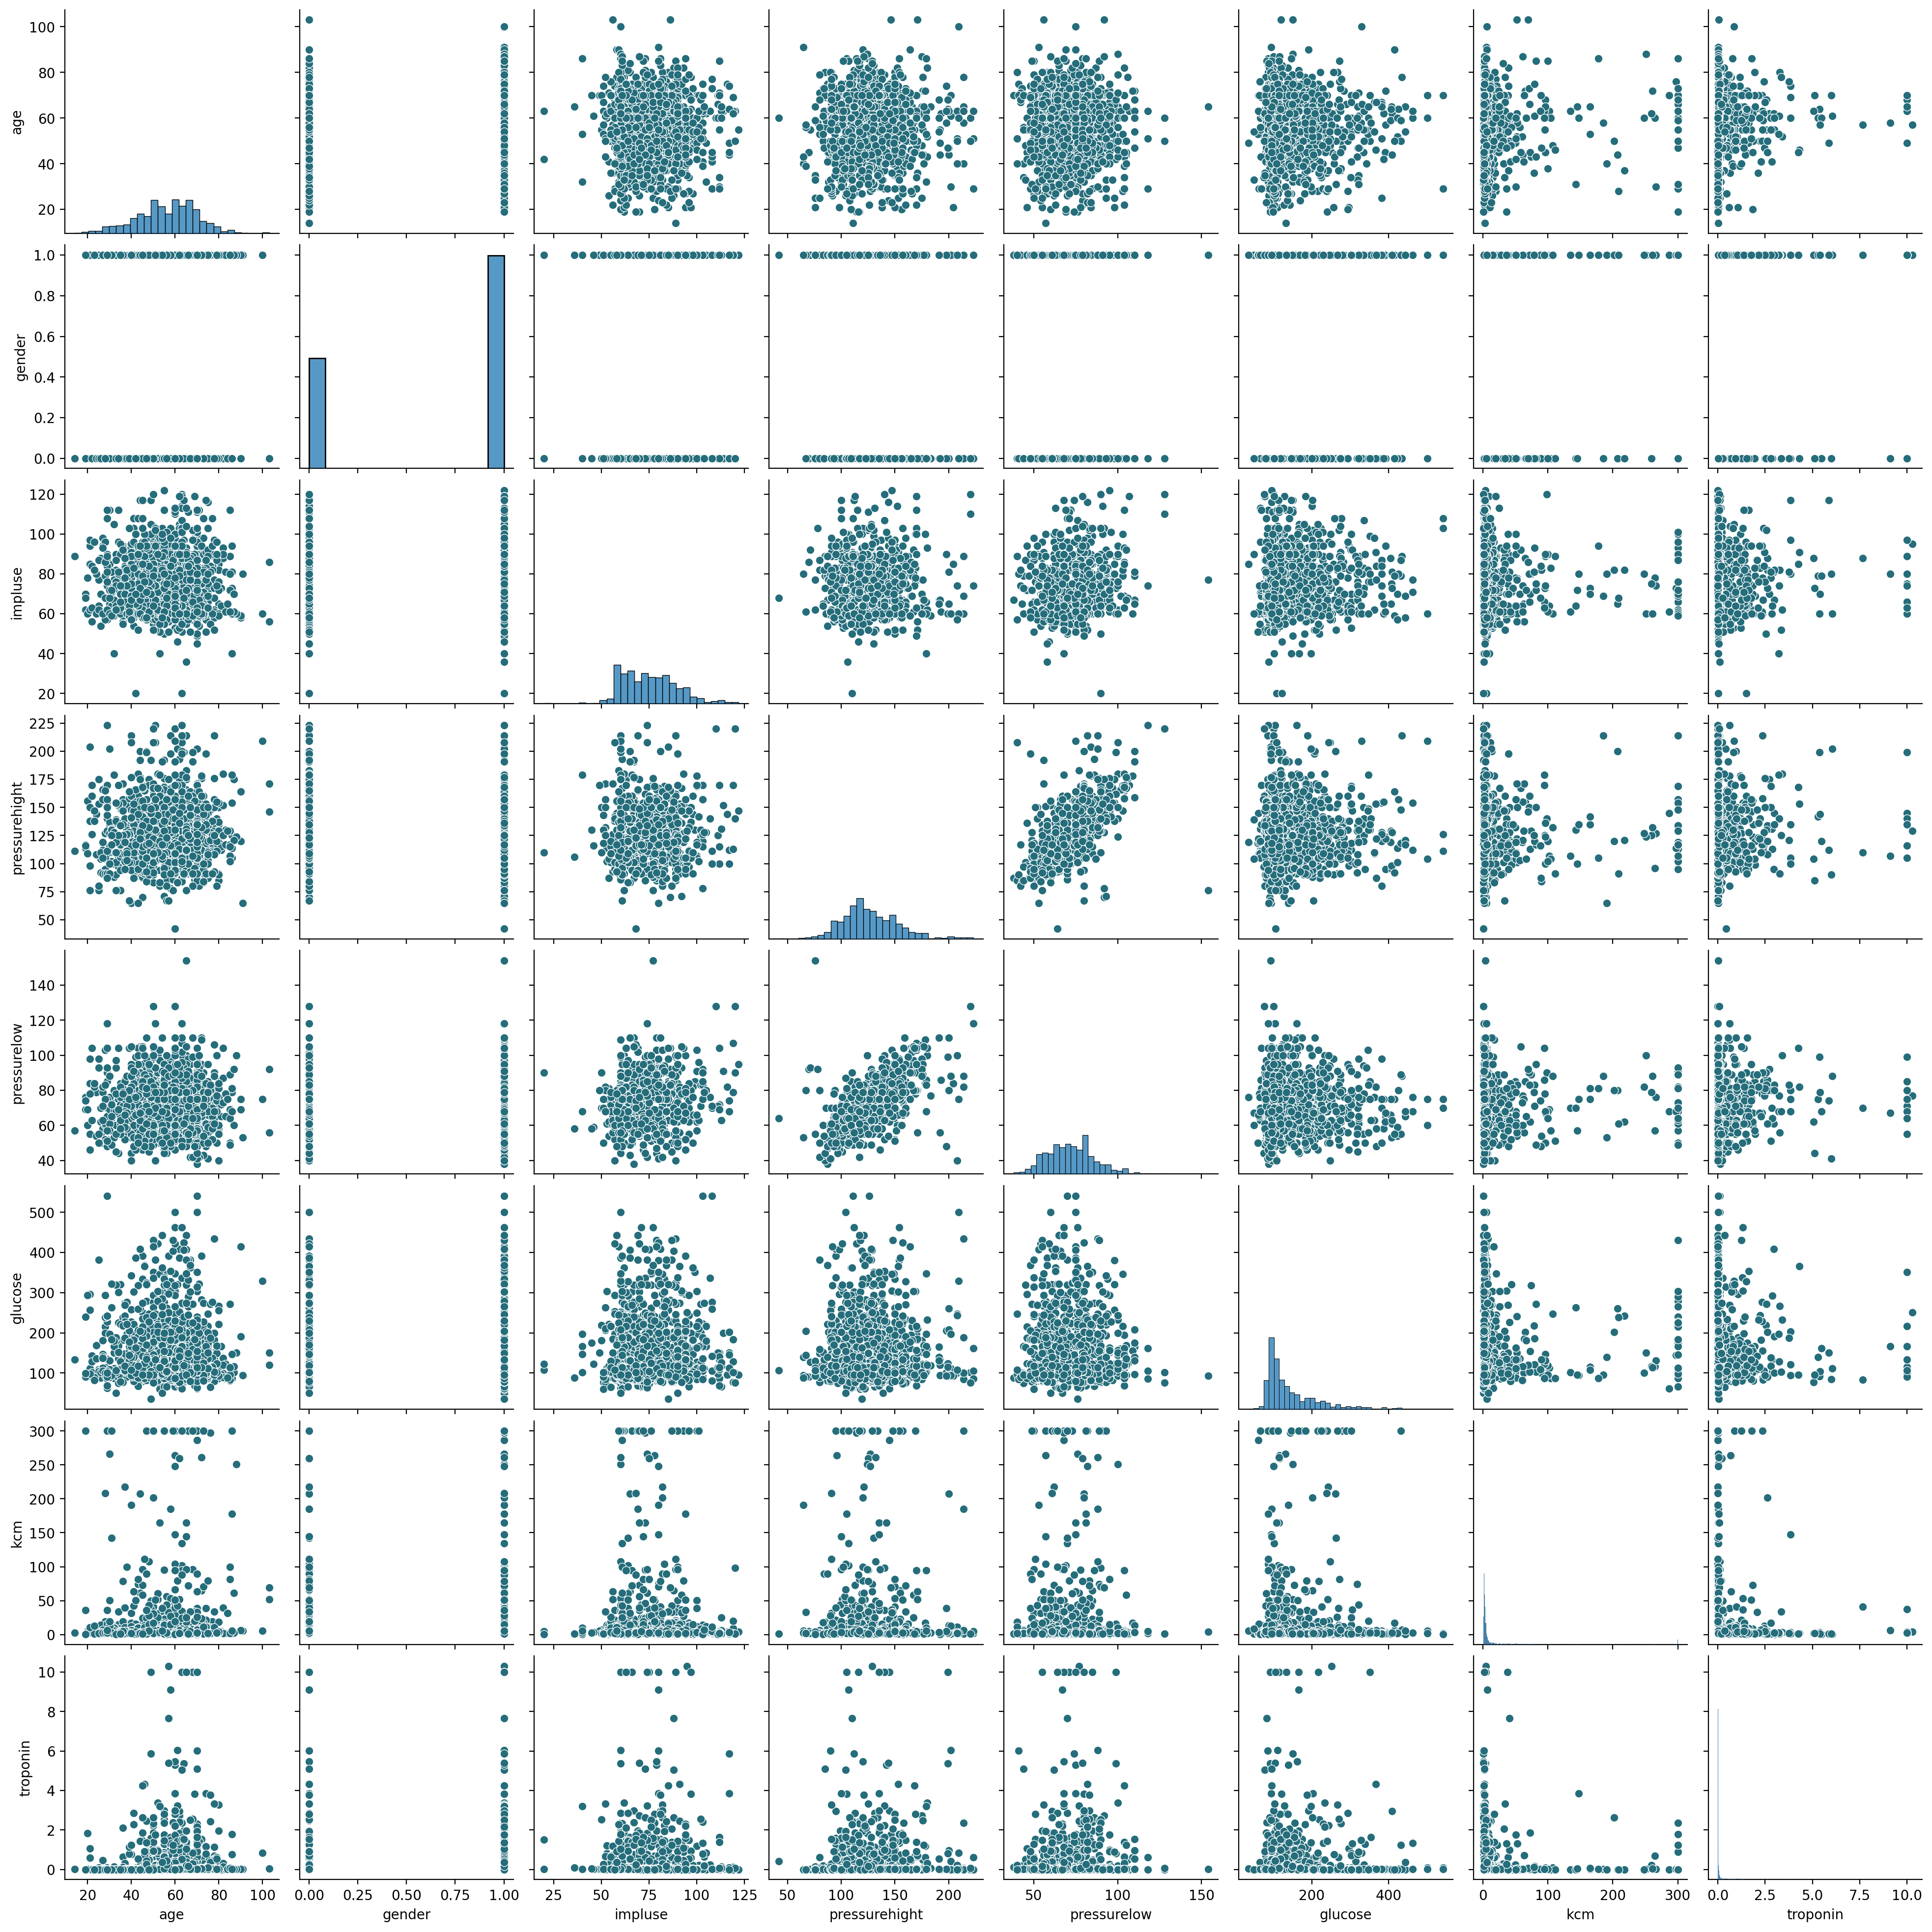

In [11]:
sns.pairplot(data, plot_kws={'color': '#256D7B'})
plt.show()

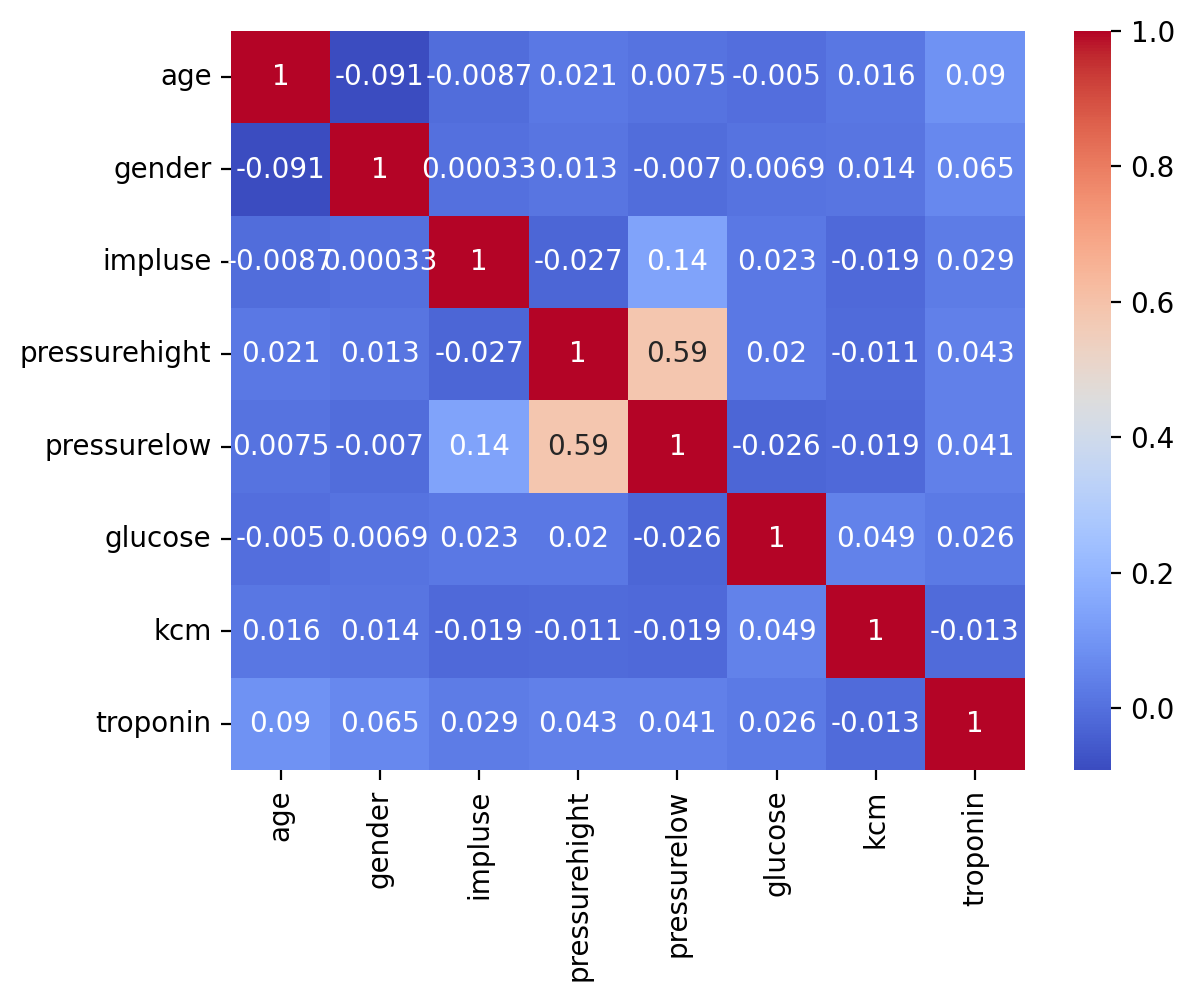

In [12]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

> Las correlaciones entre variables son muy bajas (cercanas a 0). La unica relacion notable es entre: Pressureheight y pressurelow: 0.59.


> El resto de variables tienen una correlacion muy debil (entre -0.1 y 0.1)

## Estandarizar

Estandarizamos los datos, conservando los datos originales en el DataFrame.

In [13]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [14]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = [ 'ss_' + x for x in data.columns.to_list()]
data_scaled.head()

ss_age  ss_gender  ss_impluse  ss_pressurehight  ss_pressurelow  \
0  0.574898   0.720172   -0.659096          1.249002        0.764077   
1 -2.581802   0.720172    1.297172         -1.117809       -1.870518   
2 -0.085807   0.720172   -0.798829          1.249002        0.336845   
3  0.574898   0.720172   -0.379629         -0.277973       -1.229670   
4 -0.085807   0.720172   -0.798829         -0.583368       -0.517618   

   ss_glucose    ss_kcm  ss_troponin  
0    0.173196 -0.289397    -0.302130  
1    1.981645 -0.181892     0.618067  
2    1.635912 -0.285271    -0.310032  
3    1.635912 -0.027258    -0.205544  
4    2.034835 -0.305034    -0.310032

In [15]:
columns = data.columns.to_list()
columns

['age',
 'gender',
 'impluse',
 'pressurehight',
 'pressurelow',
 'glucose',
 'kcm',
 'troponin']

In [16]:
print(data_scaled.shape)
print(data.shape)

(1303, 8)
(1303, 8)


In [17]:
data = data.join(data_scaled)
data.head()

age  gender  impluse  pressurehight  pressurelow  glucose    kcm  troponin  \
0   64       1       66            160           83    160.0   1.80     0.012   
1   21       1       94             98           46    296.0   6.75     1.060   
2   55       1       64            160           77    270.0   1.99     0.003   
3   64       1       70            120           55    270.0  13.87     0.122   
4   55       1       64            112           65    300.0   1.08     0.003   

     ss_age  ss_gender  ss_impluse  ss_pressurehight  ss_pressurelow  \
0  0.574898   0.720172   -0.659096          1.249002        0.764077   
1 -2.581802   0.720172    1.297172         -1.117809       -1.870518   
2 -0.085807   0.720172   -0.798829          1.249002        0.336845   
3  0.574898   0.720172   -0.379629         -0.277973       -1.229670   
4 -0.085807   0.720172   -0.798829         -0.583368       -0.517618   

   ss_glucose    ss_kcm  ss_troponin  
0    0.173196 -0.289397    -0.302130  
1    1.981645 -0.181892     0.618067  
2    1.635912 -0.285271    -0.310032  
3    1.635912 -0.027258    -0.205544  
4    2.034835 -0.305034    -0.310032

In [18]:
data.dropna(inplace=True)

In [19]:
data.shape

(1287, 16)

In [20]:
data.head()

age  gender  impluse  pressurehight  pressurelow  glucose    kcm  troponin  \
0   64       1       66            160           83    160.0   1.80     0.012   
1   21       1       94             98           46    296.0   6.75     1.060   
2   55       1       64            160           77    270.0   1.99     0.003   
3   64       1       70            120           55    270.0  13.87     0.122   
4   55       1       64            112           65    300.0   1.08     0.003   

     ss_age  ss_gender  ss_impluse  ss_pressurehight  ss_pressurelow  \
0  0.574898   0.720172   -0.659096          1.249002        0.764077   
1 -2.581802   0.720172    1.297172         -1.117809       -1.870518   
2 -0.085807   0.720172   -0.798829          1.249002        0.336845   
3  0.574898   0.720172   -0.379629         -0.277973       -1.229670   
4 -0.085807   0.720172   -0.798829         -0.583368       -0.517618   

   ss_glucose    ss_kcm  ss_troponin  
0    0.173196 -0.289397    -0.302130  
1    1.981645 -0.181892     0.618067  
2    1.635912 -0.285271    -0.310032  
3    1.635912 -0.027258    -0.205544  
4    2.034835 -0.305034    -0.310032

Se definen las columnas del DataFrame estandarizadas que seran utilizadas para la reduccion de dimensiones.

In [21]:
ss_columns = [ x for x in data.columns.to_list() if x not in columns ]
ss_columns

['ss_age',
 'ss_gender',
 'ss_impluse',
 'ss_pressurehight',
 'ss_pressurelow',
 'ss_glucose',
 'ss_kcm',
 'ss_troponin']

# T-SNE

t-SNE (t-distributed Stochastic Neighbor Embedding) es una técnica no supervisada de reducción no lineal de la dimensionalidad para la exploración de datos y la visualización de datos de alta dimensión. La reducción no lineal de la dimensionalidad significa que el algoritmo permite separar datos que no pueden separarse mediante una línea recta.

NO se encontraron relaciones lineales fuertes entre la mayoria de las variables, por lo tanto el uso de T-SNE fue el es mas adecuado para este conjunto de datos

In [22]:
tsne = TSNE(n_components=2, perplexity=35, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(data[ss_columns])

/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [23]:
tsne

TSNE(n_iter=1000, perplexity=35, random_state=42)

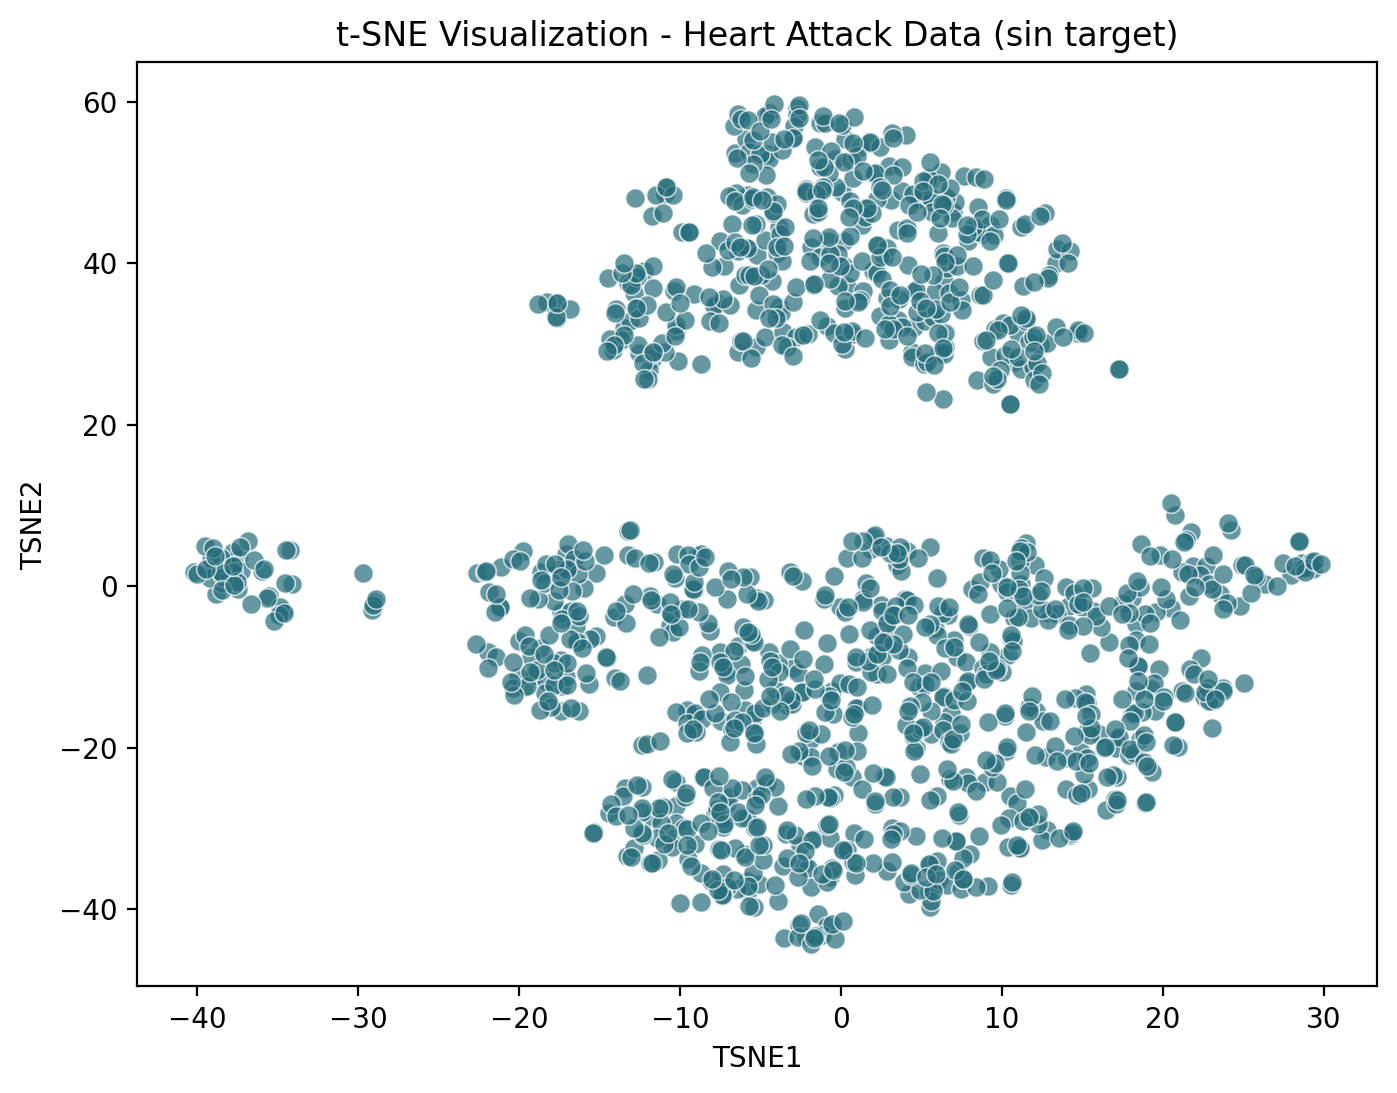

In [24]:
# Convertir a DataFrame para visualizar
tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])

# Visualización simple
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", s=50, alpha=0.7, color='#256D7B')
plt.title("t-SNE Visualization - Heart Attack Data (sin target)")
plt.show()


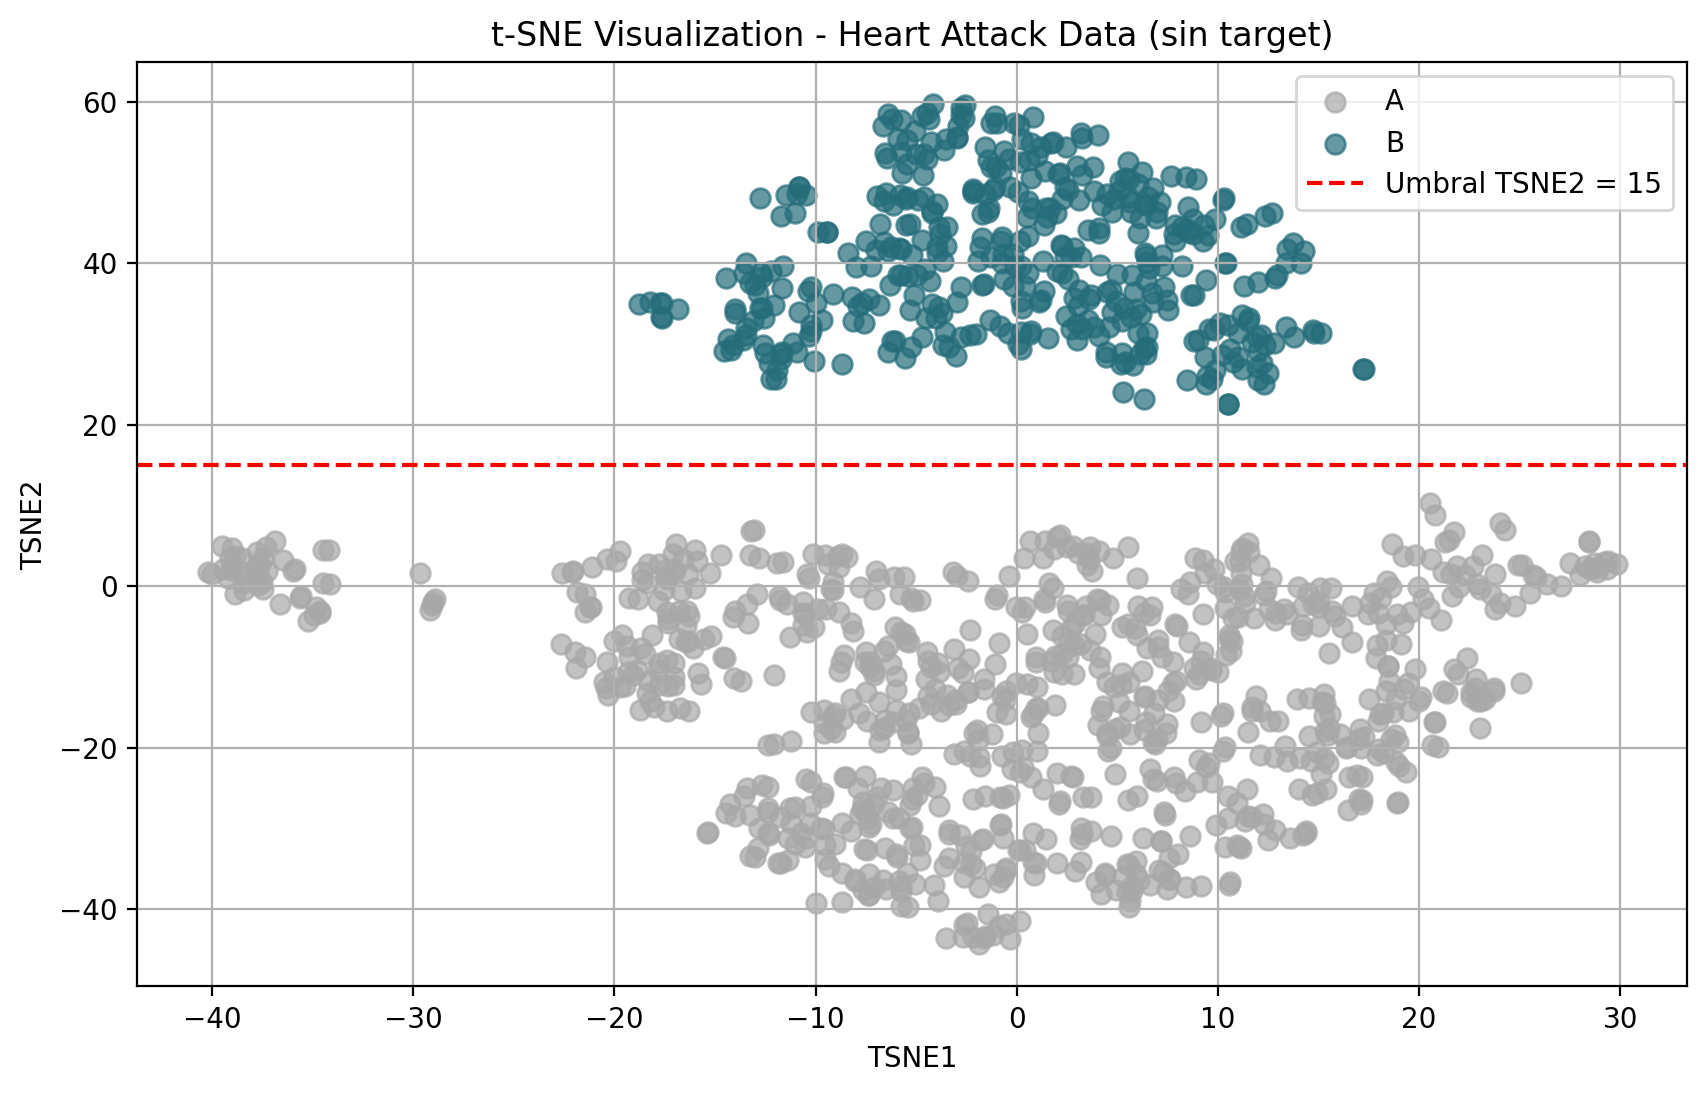

In [25]:
# Convertir a DataFrame para visualizar
tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])

umbral = 15

# Segmentación con umbral en comp2 = umbral
tsne_df['GRUPO'] = np.where(tsne_df['TSNE2'] <= umbral, 'A', 'B')

# Visualización
plt.figure(figsize=(10, 6))
for grupo, color in zip(['A', 'B'], ["#A8A8A8", '#256D7B']):
    subset = tsne_df[tsne_df['GRUPO'] == grupo]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=grupo, alpha=0.7, s=50, color=color)

plt.axhline(y=umbral, color='red', linestyle='--', label='Umbral TSNE2 = 15')
plt.title("t-SNE Visualization - Heart Attack Data (sin target)")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
tsne_df

TSNE1      TSNE2 GRUPO
0     -8.148073  -5.536495     A
1    -22.578199   1.610615     A
2    -11.430510  -2.185311     A
3    -18.673948  -7.717147     A
4    -17.381071  -3.207679     A
...         ...        ...   ...
1282  12.976966 -16.769342     A
1283  -7.545027 -23.495270     A
1284  23.774525   1.549065     A
1285 -17.411261   1.179235     A
1286  18.411568   0.683555     A

[1287 rows x 3 columns]

In [27]:
data = data.join(tsne_df)
data.dropna()

age  gender  impluse  pressurehight  pressurelow  glucose     kcm  \
0      64       1       66            160           83    160.0   1.800   
1      21       1       94             98           46    296.0   6.750   
2      55       1       64            160           77    270.0   1.990   
3      64       1       70            120           55    270.0  13.870   
4      55       1       64            112           65    300.0   1.080   
...   ...     ...      ...            ...          ...      ...     ...   
1282   67       0       51            143           75    102.0   1.310   
1283   36       1       92            147           78     77.0   4.580   
1284   29       1       81            150           51    100.0   6.480   
1285   50       0      120            220          128     76.0   0.929   
1286   35       1       74            134           58     78.0   1.370   

      troponin    ss_age  ss_gender  ss_impluse  ss_pressurehight  \
0        0.012  0.574898   0.720172   -0.659096          1.249002   
1        1.060 -2.581802   0.720172    1.297172         -1.117809   
2        0.003 -0.085807   0.720172   -0.798829          1.249002   
3        0.122  0.574898   0.720172   -0.379629         -0.277973   
4        0.003 -0.085807   0.720172   -0.798829         -0.583368   
...        ...       ...        ...         ...               ...   
1282     0.030  0.795133  -1.388557    0.388905          0.867259   
1283     0.004  0.428075   0.720172    1.017705          0.332817   
1284     0.003 -0.966746   0.720172    1.017705         -1.232332   
1285     0.072 -0.673100  -1.388557   -1.218029         -1.308681   
1286     0.003 -1.186981   0.720172   -1.287896          3.081372   

      ss_pressurelow  ss_glucose    ss_kcm  ss_troponin      TSNE1      TSNE2  \
0           0.764077    0.173196 -0.289397    -0.302130  -8.148073  -5.536495   
1          -1.870518    1.981645 -0.181892     0.618067 -22.578199   1.610615   
2           0.336845    1.635912 -0.285271    -0.310032 -11.430510  -2.185311   
3          -1.229670    1.635912 -0.027258    -0.205544 -18.673948  -7.717147   
4          -0.517618    2.034835 -0.305034    -0.310032 -17.381071  -3.207679   
...              ...         ...       ...          ...        ...        ...   
1282        0.194435   -0.890598 -0.224242    -0.304764  12.976966 -16.769342   
1283       -0.304002   -0.079455 -0.288746    -0.300373  -7.545027 -23.495270   
1284       -1.585697   -0.385296 -0.299605     0.164993  23.774525   1.549065   
1285        0.408050    0.306170 -0.302645    -0.252959 -17.411261   1.179235   
1286       -2.297749   -0.518270 -0.282665    -0.310032  18.411568   0.683555   

     GRUPO  
0        A  
1        A  
2        A  
3        A  
4        A  
...    ...  
1282     A  
1283     A  
1284     A  
1285     A  
1286     A  

[1271 rows x 19 columns]

In [28]:
data.dropna(inplace=True)

In [29]:
data.shape

(1271, 19)

# Distribucion de los datos originales entre los grupos

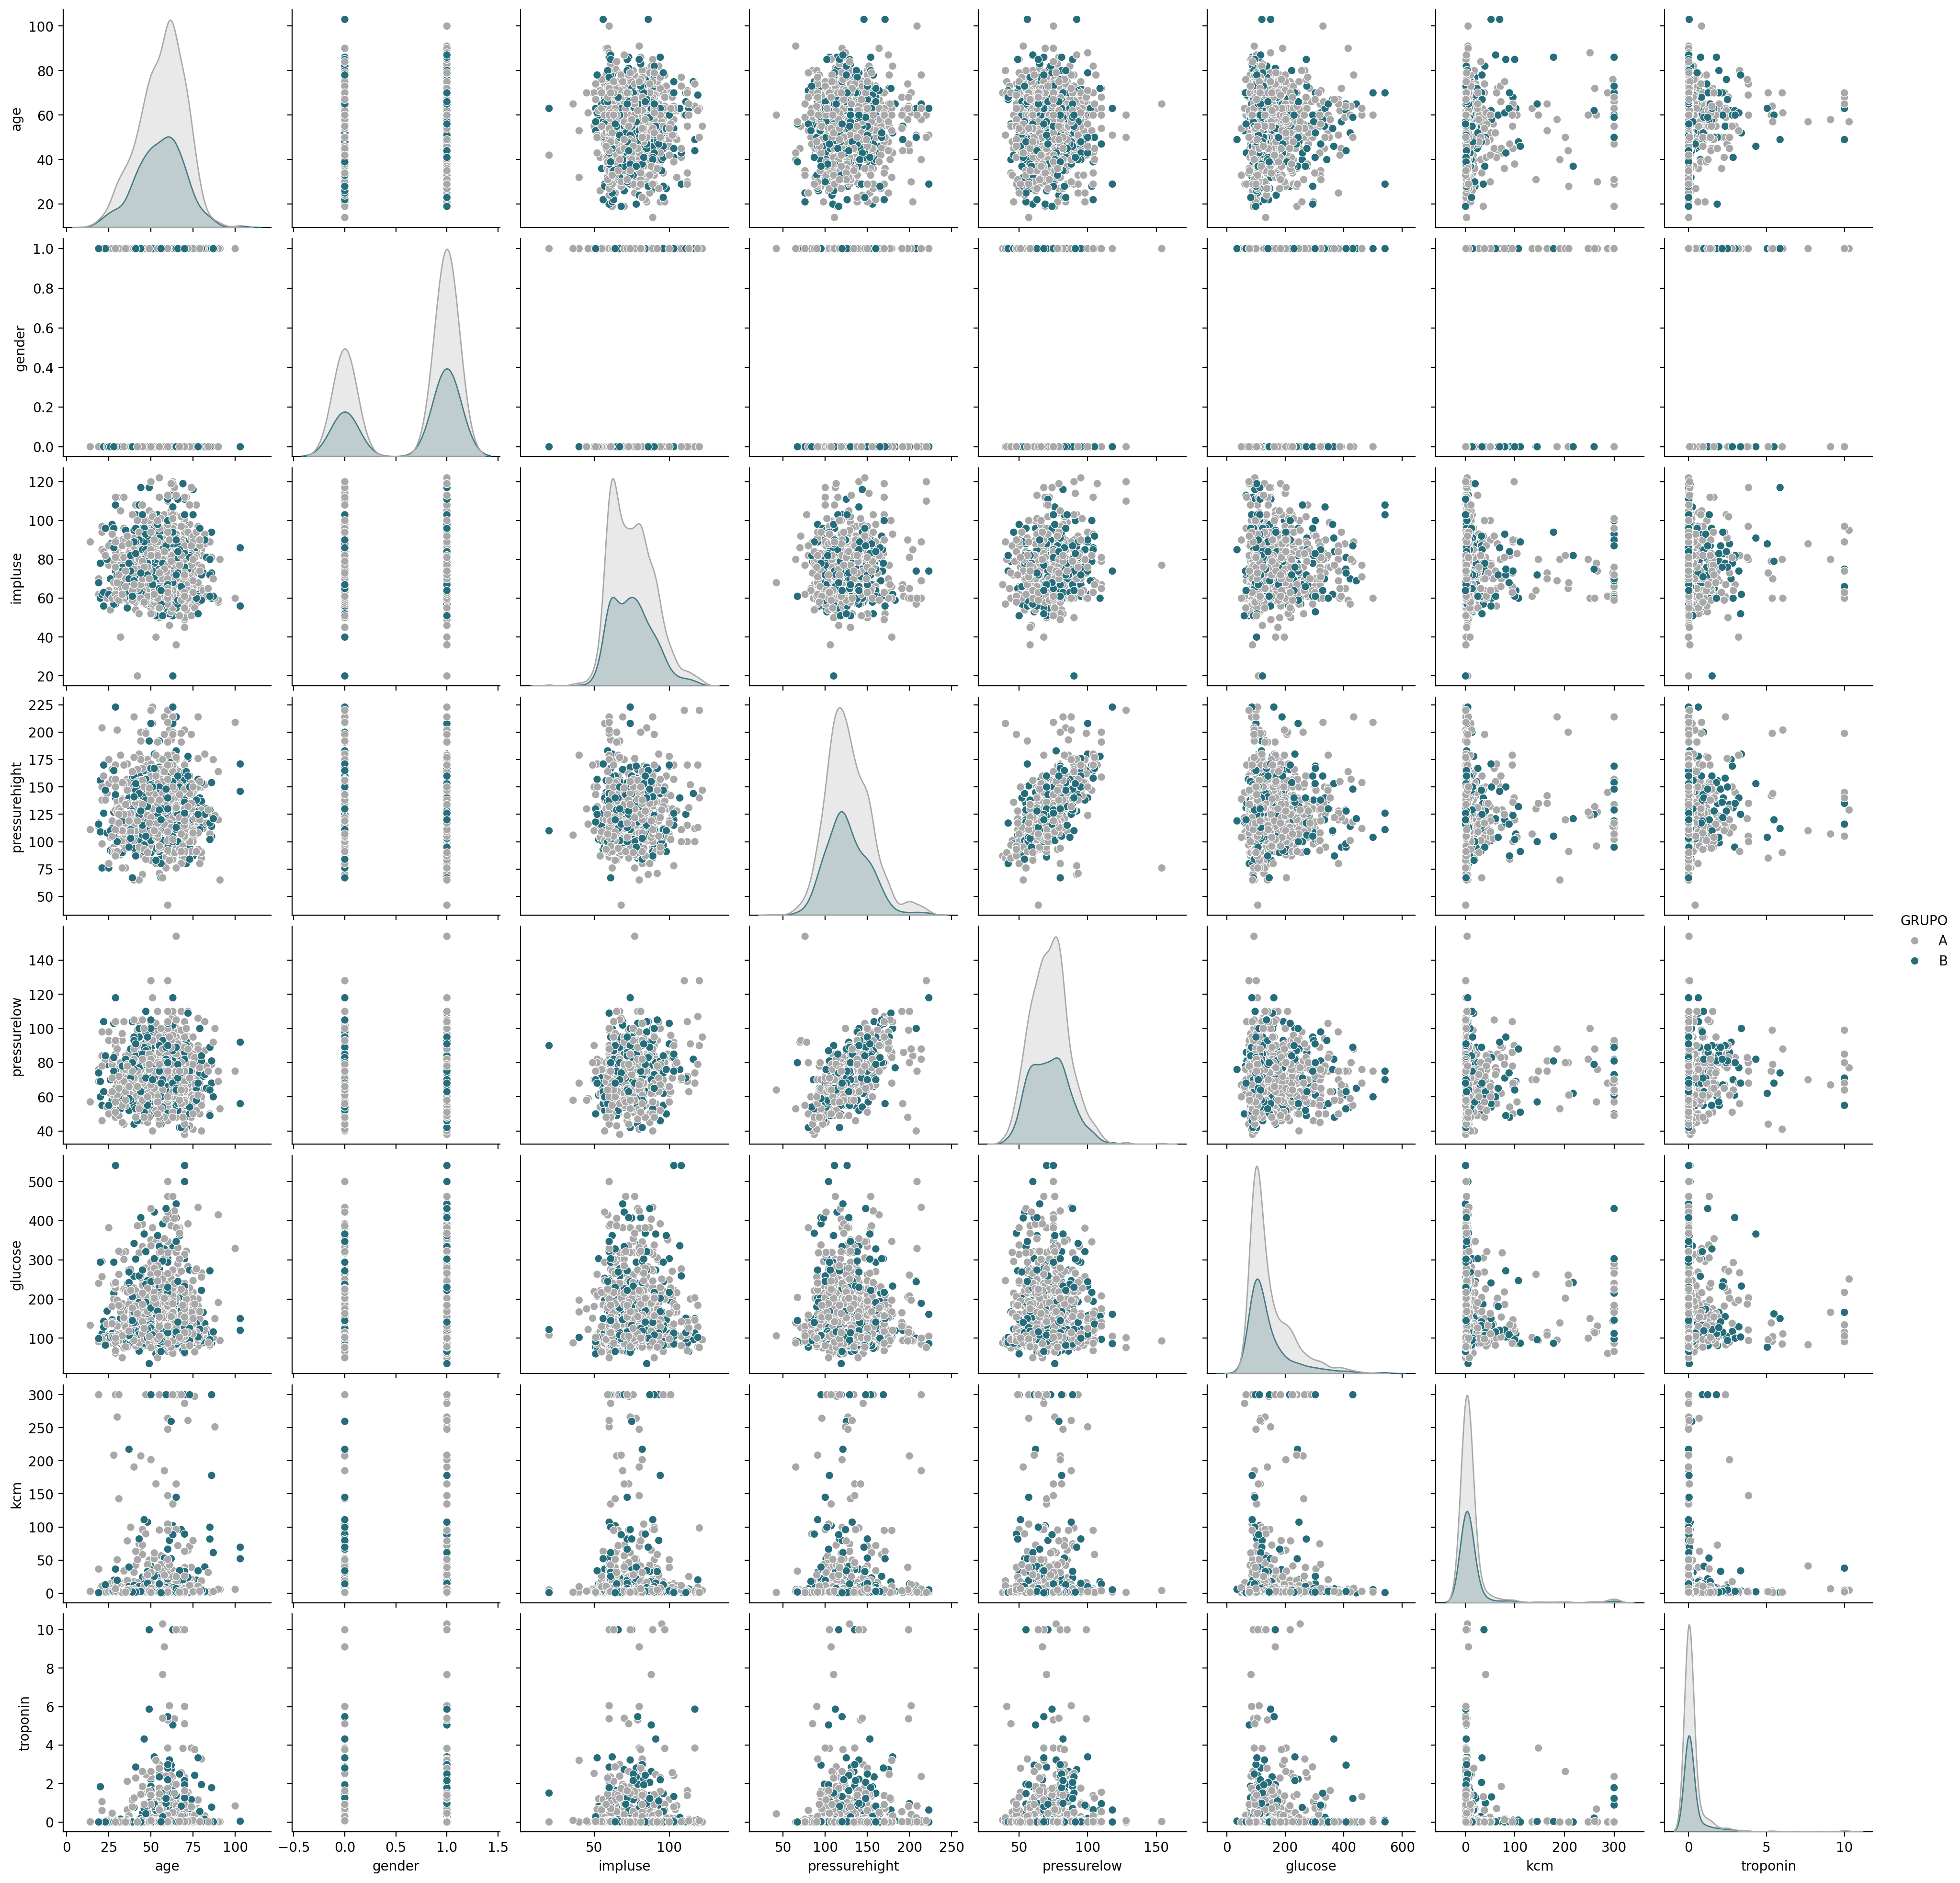

In [30]:
sns.pairplot(data[columns+['GRUPO']], hue='GRUPO', palette=["#A8A8A8", '#256D7B'])
plt.show()

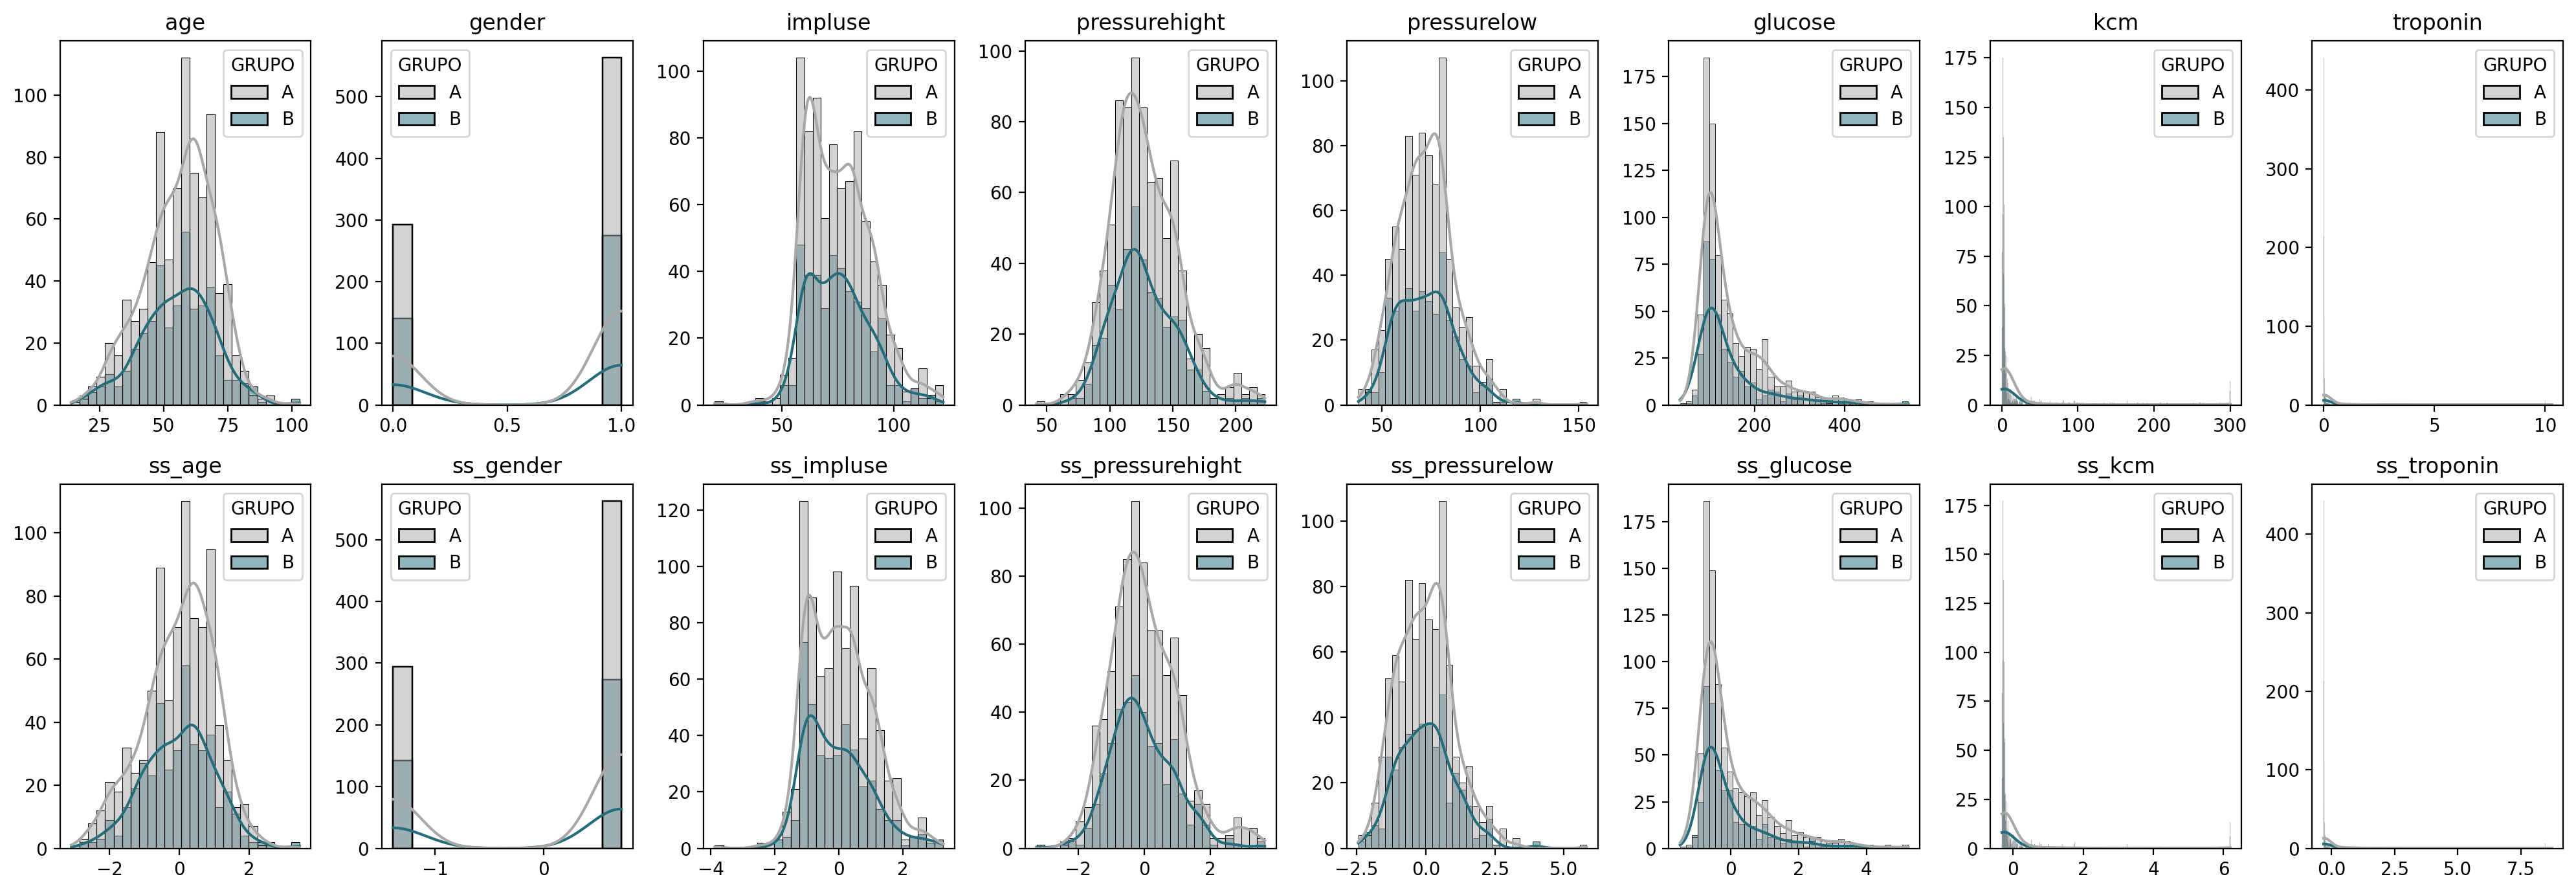

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes hasta 8 variables en var_disc
fig, axes = plt.subplots(2, 8, figsize=(20, 7))  # 4 filas, 2 columnas
axes = axes.flatten()  # Para poder iterar fácilmente

# Iteramos sobre las variables y ejes
for i, var in enumerate(data.columns):
    if i >= 16:  # Por si hay más de 8 variables, ignora el resto
        break
    ax = axes[i]
    sns.histplot(data=data, x=var, hue='GRUPO', kde=True, ax=ax, palette=["#A8A8A8", '#256D7B'])
    #listings[var].value_counts().plot(kind='bar', color='#256D7B', ax=ax)
    ax.set_title(f'{var}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [32]:
data.sample(6)

age  gender  impluse  pressurehight  pressurelow  glucose     kcm  \
1078   55       1       91            120           80     87.0  14.970   
826    47       0       67            113           82    143.0   3.300   
558    35       1       61            125           80    100.0   7.660   
197    51       0       70            140           90    150.0   1.810   
881    54       1       63            105           64    121.0  11.940   
796    49       1      117            112           74    150.0   0.982   

      troponin    ss_age  ss_gender  ss_impluse  ss_pressurehight  \
1078     0.086 -0.306041  -1.388557   -1.078296          0.485515   
826      0.003  1.455838   0.720172    0.598505          0.027422   
558      0.003  0.207840   0.720172    0.319038          0.829084   
197      0.013  1.382426  -1.388557   -0.659096          0.867259   
881      0.005 -0.232630  -1.388557    0.738239          1.439874   
796      5.870  0.207840   0.720172   -1.008429         -0.316147   

      ss_pressurelow  ss_glucose    ss_kcm  ss_troponin      TSNE1      TSNE2  \
1078        0.550461   -0.478378 -0.290483     0.563628   4.233036  47.151257   
826         0.550461   -0.558162 -0.131071     1.820997  20.926750 -19.868372   
558         0.194435   -0.172537 -0.210994    -0.144080 -10.237230  32.365604   
197         1.618540   -0.425188 -0.264204    -0.066812  22.670940   2.526012   
881         0.764077   -0.637947 -0.297867    -0.303008  15.176440 -14.347905   
796         0.194435   -0.318808 -0.291135    -0.307398 -11.714841  28.718267   

     GRUPO  
1078     B  
826      A  
558      B  
197      A  
881      A  
796      B

In [33]:
data.groupby('GRUPO').agg(['min', 'max', 'count'])

age            gender           impluse            pressurehight  ...  \
      min  max count    min max count     min  max count           min  ...   
GRUPO                                                                   ...   
A      14  100   856      0   1   856      20  122   856            42  ...   
B      19  103   415      0   1   415      20  119   415            67  ...   

      ss_kcm ss_troponin                      TSNE1                   \
       count         min       max count        min        max count   
GRUPO                                                                  
A        856   -0.310910  8.467840   856 -40.216480  29.827408   856   
B        415   -0.311788  8.731255   415 -18.794998  17.266125   415   

           TSNE2                   
             min        max count  
GRUPO                              
A     -44.381081  10.301229   856  
B      22.585527  59.642776   415  

[2 rows x 54 columns]